In [1]:
cd('/content/drive/MyDrive/Emotion Detection')

[Errno 2] No such file or directory: '(/content/drive/MyDrive/Emotion Detection)'
/content


In [2]:
import os

# Specify the path to the desired directory
path = "/content/drive/MyDrive/Emotion Detection"

# Use os.chdir() to change the current working directory
os.chdir(path)

In [3]:
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/MyDrive/Emotion Detection


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

In [5]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [6]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )


In [8]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/Emotion Detection",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [11]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/Emotion Detection/Test_Data",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )


Found 36 images belonging to 7 classes.


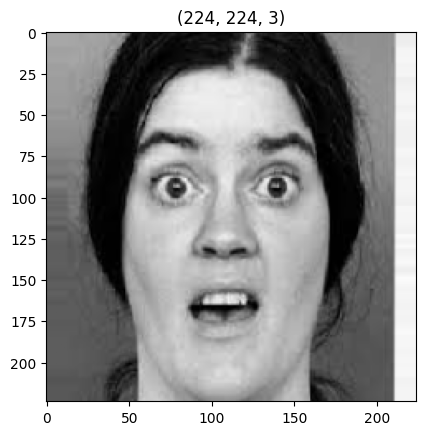

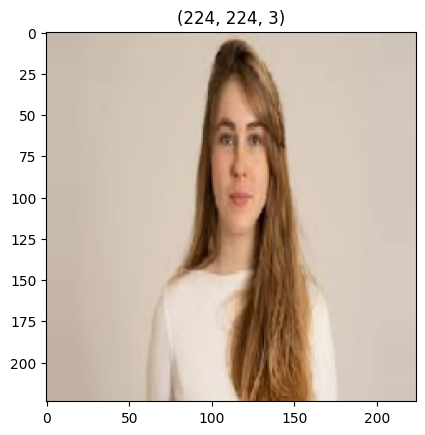

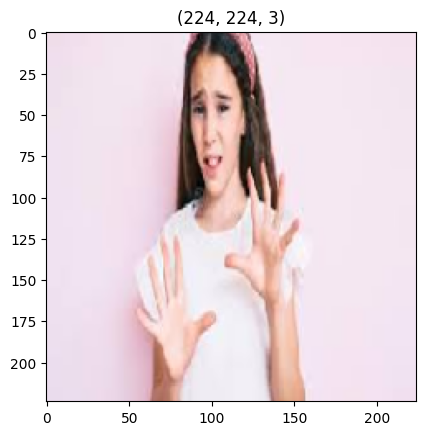

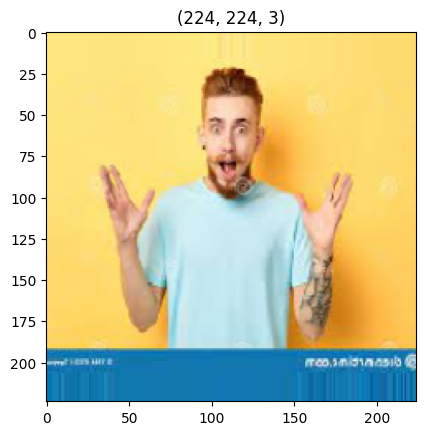

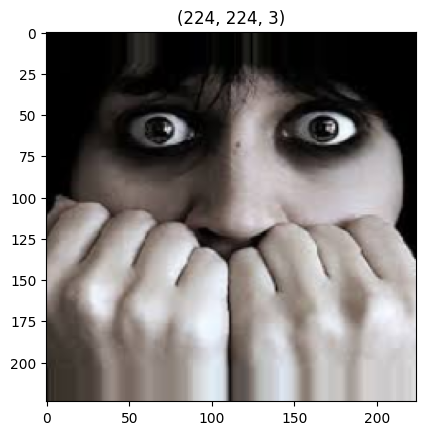

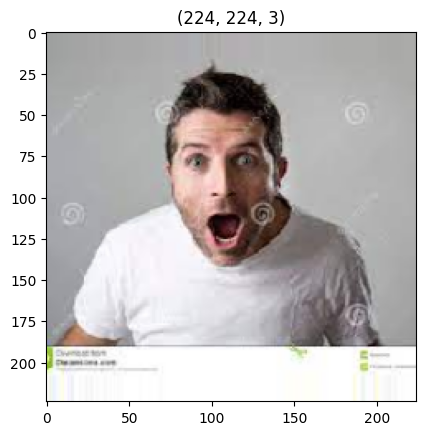

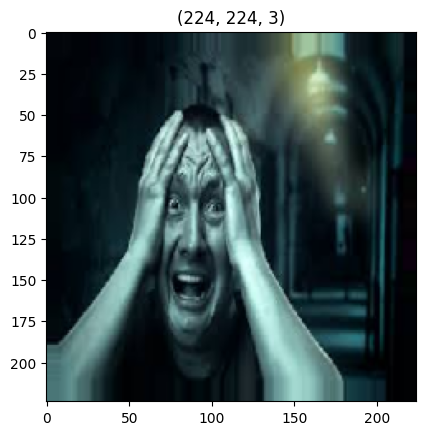

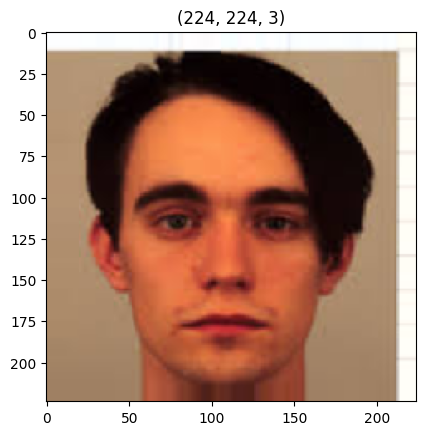

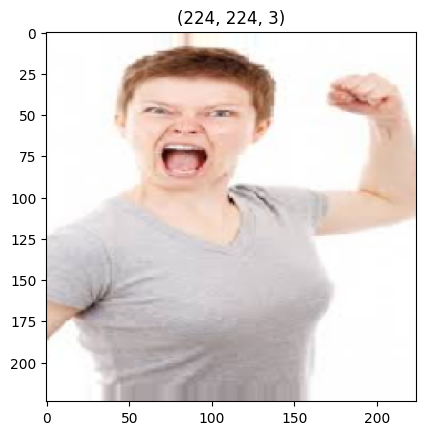

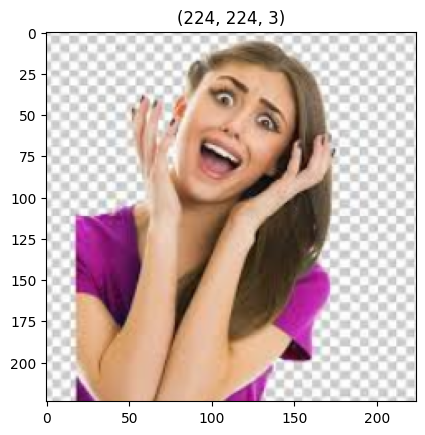

In [12]:
# to visualize the images in the traing data denerator

t_img , label = train_data.next()

# function when called will prot the images
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)



In [13]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]


In [14]:
hist = model.fit_generator(train_data,
                           steps_per_epoch= 10,
                           epochs= 30,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es,mc])

<ipython-input-14-f681b3c69731>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 12.5568 - accuracy: 0.1824


Epoch 1: val_accuracy improved from -inf to 0.19444, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 106s 10s/step - loss: 12.5568 - accuracy: 0.1824 - val_loss: 15.2012 - val_accuracy: 0.1944
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 4.4328 - accuracy: 0.5723

10/10 [==============================] - 19s 2s/step - loss: 4.4328 - accuracy: 0.5723
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 2.4470 - accuracy: 0.6981

10/10 [==============================] - 19s 2s/step - loss: 2.4470 - accuracy: 0.6981
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 1.4997 - accuracy: 0.7862

10/10 [==============================] - 19s 2s/step - loss: 1.4997 - accuracy: 0.7862
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.7113 - accuracy: 0.8553

10/10 [==============================] - 19s 2s/step - loss: 0.7113 - accuracy: 0.8553
Epoch 6/30
10/10 [==============================] - ETA: 0s - loss: 0.5813 - accuracy: 0.8931

10/10 [==============================] - 19s 2s/step - loss: 0.5813 - accuracy: 0.8931
Epoch 7/30
10/10 [==============================] - ETA: 0s - loss: 0.2873 - accuracy: 0.9371

10/10 [==============================] - 19s 2s/step - loss: 0.2873 - accuracy: 0.9371
Epoch 8/30
10/10 [==============================] - ETA: 0s - loss: 0.2086 - accuracy: 0.9528

10/10 [==============================] - 19s 2s/step - loss: 0.2086 - accuracy: 0.9528
Epoch 9/30
10/10 [==============================] - ETA: 0s - loss: 0.1381 - accuracy: 0.9686

10/10 [==============================] - 19s 2s/step - loss: 0.1381 - accuracy: 0.9686
Epoch 10/30
10/10 [==============================] - ETA: 0s - loss: 0.1429 - accuracy: 0.9654

10/10 [==============================] - 18s 2s/step - loss: 0.1429 - accuracy: 0.9654
Epoch 11/30
10/10 [==============================] - ETA: 0s - loss: 0.0357 - accuracy: 0.9811

10/10 [==============================] - 22s 2s/step - loss: 0.0357 - accuracy: 0.9811
Epoch 12/30
10/10 [==============================] - ETA: 0s - loss: 0.0190 - accuracy: 0.9969

10/10 [==============================] - 19s 2s/step - loss: 0.0190 - accuracy: 0.9969
Epoch 13/30
10/10 [==============================] - ETA: 0s - loss: 0.0735 - accuracy: 0.9811

10/10 [==============================] - 19s 2s/step - loss: 0.0735 - accuracy: 0.9811
Epoch 14/30
10/10 [==============================] - ETA: 0s - loss: 0.0977 - accuracy: 0.9750

10/10 [==============================] - 19s 2s/step - loss: 0.0977 - accuracy: 0.9750
Epoch 15/30
10/10 [==============================] - ETA: 0s - loss: 0.0524 - accuracy: 0.9811

10/10 [==============================] - 19s 2s/step - loss: 0.0524 - accuracy: 0.9811
Epoch 16/30
10/10 [==============================] - ETA: 0s - loss: 0.0357 - accuracy: 0.9937

10/10 [==============================] - 19s 2s/step - loss: 0.0357 - accuracy: 0.9937
Epoch 17/30
10/10 [==============================] - ETA: 0s - loss: 0.0663 - accuracy: 0.9686

10/10 [==============================] - 19s 2s/step - loss: 0.0663 - accuracy: 0.9686
Epoch 18/30
10/10 [==============================] - ETA: 0s - loss: 0.1184 - accuracy: 0.9748

10/10 [==============================] - 19s 2s/step - loss: 0.1184 - accuracy: 0.9748
Epoch 19/30
10/10 [==============================] - ETA: 0s - loss: 0.0308 - accuracy: 0.9874

10/10 [==============================] - 19s 2s/step - loss: 0.0308 - accuracy: 0.9874
Epoch 20/30
10/10 [==============================] - ETA: 0s - loss: 0.0639 - accuracy: 0.9780

10/10 [==============================] - 19s 2s/step - loss: 0.0639 - accuracy: 0.9780
Epoch 21/30
10/10 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 0.9937

10/10 [==============================] - 19s 2s/step - loss: 0.0141 - accuracy: 0.9937
Epoch 22/30
10/10 [==============================] - ETA: 0s - loss: 0.0272 - accuracy: 0.9906

10/10 [==============================] - 19s 2s/step - loss: 0.0272 - accuracy: 0.9906
Epoch 23/30
10/10 [==============================] - ETA: 0s - loss: 0.0295 - accuracy: 0.9906

10/10 [==============================] - 19s 2s/step - loss: 0.0295 - accuracy: 0.9906
Epoch 24/30
10/10 [==============================] - ETA: 0s - loss: 0.0247 - accuracy: 0.9874

10/10 [==============================] - 18s 2s/step - loss: 0.0247 - accuracy: 0.9874
Epoch 25/30
10/10 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.9937

10/10 [==============================] - 19s 2s/step - loss: 0.0110 - accuracy: 0.9937
Epoch 26/30
10/10 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 0.9969

10/10 [==============================] - 19s 2s/step - loss: 0.0071 - accuracy: 0.9969
Epoch 27/30
10/10 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9969

10/10 [==============================] - 19s 2s/step - loss: 0.0031 - accuracy: 0.9969
Epoch 28/30
10/10 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9906

10/10 [==============================] - 19s 2s/step - loss: 0.0182 - accuracy: 0.9906
Epoch 29/30
10/10 [==============================] - ETA: 0s - loss: 0.1090 - accuracy: 0.9843

10/10 [==============================] - 19s 2s/step - loss: 0.1090 - accuracy: 0.9843
Epoch 30/30
10/10 [==============================] - ETA: 0s - loss: 0.0199 - accuracy: 0.9969

10/10 [==============================] - 19s 2s/step - loss: 0.0199 - accuracy: 0.9969


In [16]:

# Loading the best fit model

from keras.models import load_model
model = load_model("/content/drive/MyDrive/Emotion Detection/best_model.h5")

In [17]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

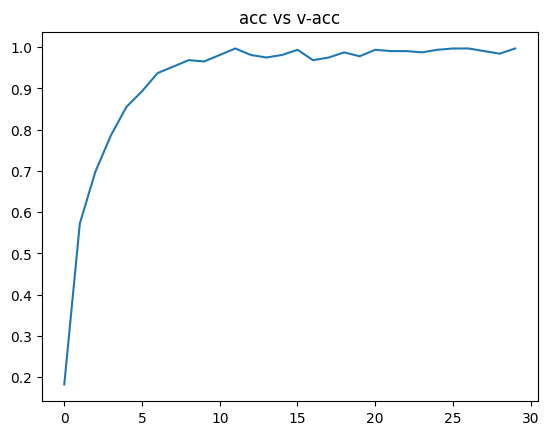

In [18]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

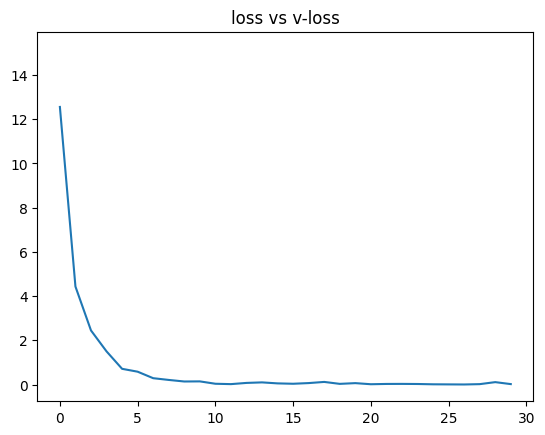

In [19]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [20]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))


1/1 [==============================] - 0s 58ms/step
 the image is of Fear


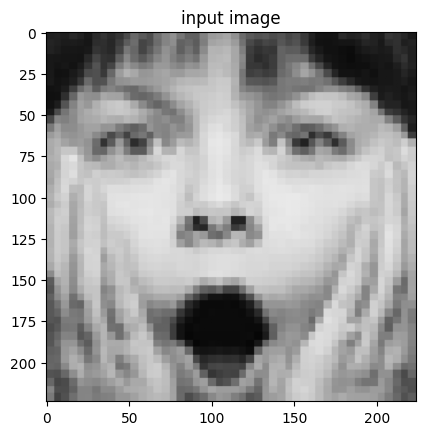

In [23]:
path = "/content/drive/MyDrive/Emotion Detection/Test_Data/surprised/im14.png"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()